In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


## About Dataset

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

## Overview

This project aims to analyze datas of Netflix and make predictions about the sentiment analysis.

## Import Libraries

In [30]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
import plotly.express as px 

from textblob import TextBlob 

from langdetect import detect

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import warnings
warnings.filterwarnings("ignore")

## EDA and Data Visualization

In [2]:
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3105,s3106,Movie,John Mulaney & The Sack Lunch Bunch,Rhys Thomas,"John Mulaney, Alexander Bello, Tyler Bourke, A...",United States,"December 24, 2019",2019,TV-PG,70 min,"Children & Family Movies, Comedies",John Mulaney and his kid pals tackle existenti...
2980,s2981,TV Show,What the Love! with Karan Johar,NaN,Karan Johar,United States,"January 30, 2020",2020,TV-14,1 Season,"International TV Shows, Reality TV, Romantic T...",With help from celebrity guests and a glam squ...
4851,s4852,Movie,Steve Martin and Martin Short: An Evening You ...,Marcus Raboy,"Steve Martin, Martin Short",United States,"May 25, 2018",2018,TV-14,74 min,Stand-Up Comedy,Longtime pals and showbiz icons Steve Martin a...
2678,s2679,Movie,Jem and the Holograms,Jon M. Chu,"Aubrey Peeples, Stefanie Scott, Hayley Kiyoko,...",United States,"April 16, 2020",2015,PG,119 min,"Children & Family Movies, Dramas, Music & Musi...",After becoming an overnight star via the inter...
1749,s1750,Movie,Christmas Break-In,Michael Kampa,"Danny Glover, Denise Richards, Cameron Seely, ...",United States,"November 1, 2020",2019,TV-PG,87 min,"Children & Family Movies, Comedies","Stranded at school before holiday break, a pre..."


In [8]:
df.shape

(8807, 12)

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Distribution of Content

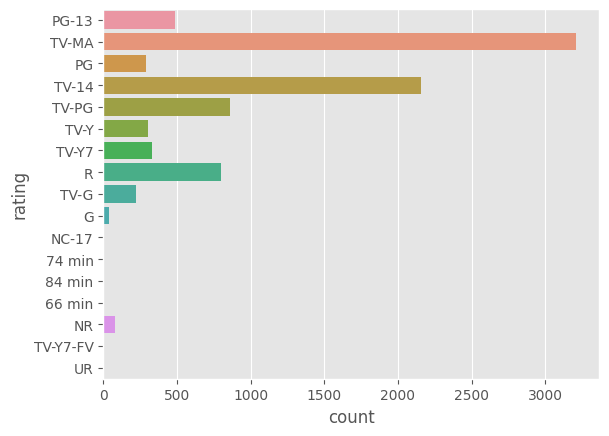

In [4]:
sns.countplot(y = df.rating);

In [ ]:
The graph shows that most of the movies are categorized as TV-MA, which means that they are rated as mature and adults.

## Top 10 directors

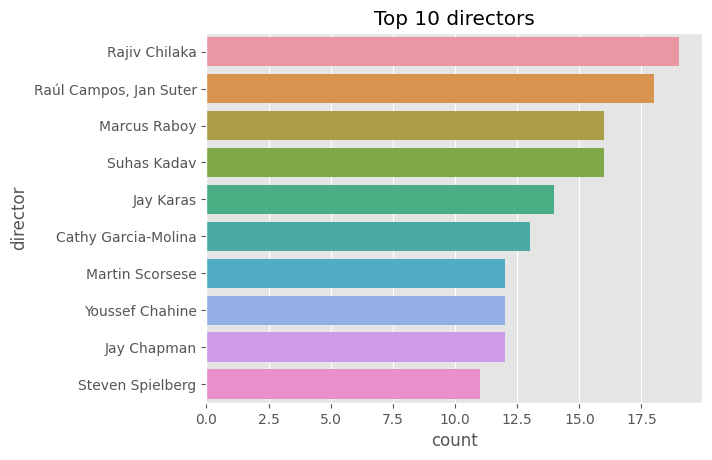

In [10]:
directors = df.director.value_counts().head(10)

sns.barplot(x=directors, y=directors.index)
plt.title("Top 10 directors");



## Top 10 Actors

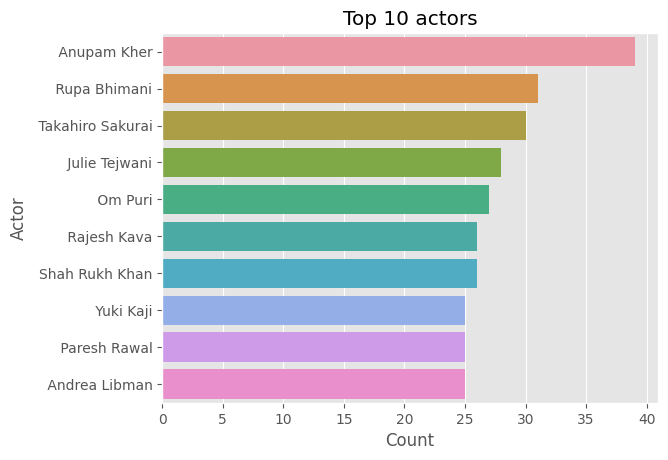

In [30]:
dff = df.dropna(subset=['cast'])

# Explode the cast column to get individual actors
exploded_actors = dff["cast"].str.split(',').explode()

actors = exploded_actors.value_counts().head(10)

actors = pd.DataFrame({"Actor": actors.index, "Count": actors.values})

sns.barplot(x="Count", y="Actor", data=actors)
plt.title("Top 10 actors");



## Top 10 Countries

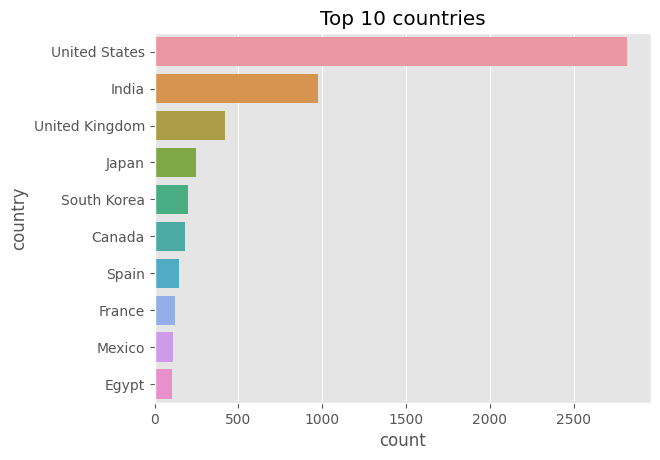

In [32]:
country = df["country"].value_counts().head(10)

sns.barplot(x=country, y=country.index)
plt.title("Top 10 countries");

## Analyzing Release Year

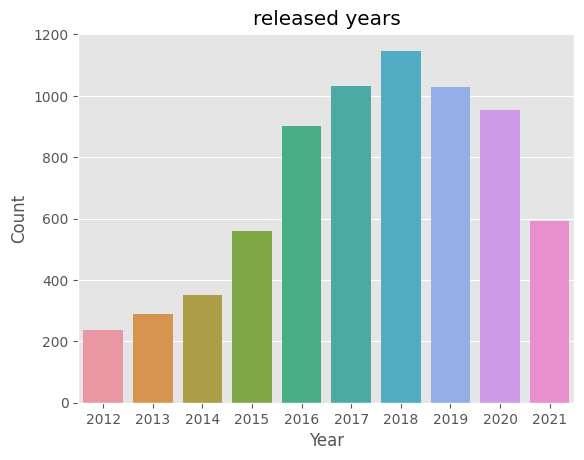

In [39]:
year = df["release_year"].value_counts().head(10)

year = pd.DataFrame({"Year": year.index, "Count": year.values})

sns.barplot(data=year, x="Year", y="Count")
plt.title("released years");

the graph above shows that the most movies were released in 2018.

## Trend of content produced over the years on Netflix

In [12]:
df1=df[['type','release_year']]

df2=df1.groupby(['release_year','type']).size().reset_index(name='Total Content')
df2 = df2[df2['release_year']>=2000]

fig3 = px.line(df2, x="release_year", y="Total Content", color='type',title='Trend of content produced over the years on Netflix')
fig3.show()

## Sentiment Analysis

In [16]:
dff = df[["title","description"]]
dff

,title,description
0,Dick Johnson Is Dead,"As her father nears the end of his life, filmm..."
1,Blood & Water,"After crossing paths at a party, a Cape Town t..."
2,Ganglands,To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,In a city of coaching centers known to train I...
...,...,...
8802,Zodiac,"A political cartoonist, a crime reporter and a..."
8803,Zombie Dumb,"While living alone in a spooky town, a young g..."
8804,Zombieland,Looking to survive in a world taken over by zo...
8805,Zoom,"Dragged from civilian life, a former superhero..."


In [32]:
dff["language"] = dff["description"].apply(detect)

In [33]:
dff.language.value_counts()

language
en    8806
nl       1
Name: count, dtype: int64

In [36]:
dff = dff[dff["language"] == "en"]

In [37]:
dff[["subjectivity", "polarity"]] = dff.description.apply(lambda x: pd.Series(TextBlob(x).sentiment))

In [42]:
dff["sentiment"] = dff["polarity"].apply(lambda x: "positive" if x > 0 else ("negative" if x < 0 else "neutral"))

In [43]:
dff.sample(5)

,title,description,language,subjectivity,polarity,sentiment
5029,Seven Seconds,The death of a 15-year-old African American bo...,en,0.000000,0.000000,neutral
2995,Airplane Mode,"When Ana, an influencer, crashes her car while...",en,-0.150000,0.100000,positive
1892,A Go! Go! Cory Carson Halloween,"Cory, Chrissy and Freddie are on the hunt for ...",en,0.300000,0.100000,positive
3495,Jeff Dunham: Beside Himself,Jeff Dunham takes the stage in Dallas with his...,en,0.133333,0.133333,positive
1477,Dare Me,Relationships topple and loyalties flip when a...,en,0.065455,0.364848,positive


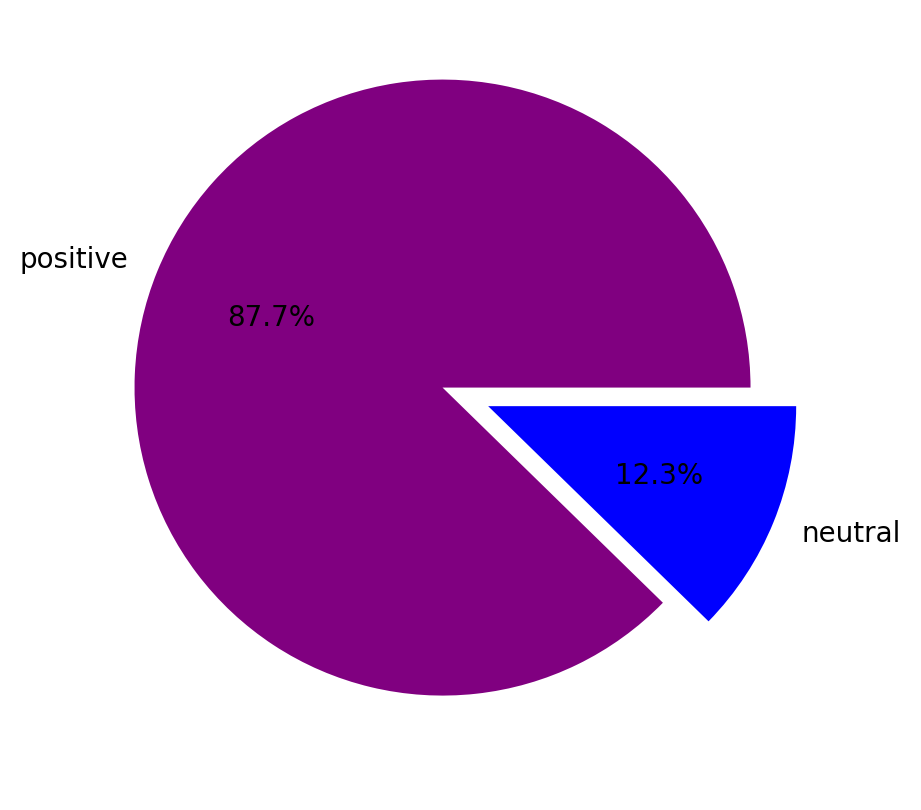

In [48]:
x = dff["sentiment"].value_counts(normalize=True)
my_color = ["purple","blue"]
label = ["positive", "neutral"]
my_explode = [0.15,0.01]
plt.figure(figsize=(5,5), dpi = 200)
plt.pie(x, colors=my_color, labels=label, explode=my_explode, autopct="%1.1f%%");

## Word cloud

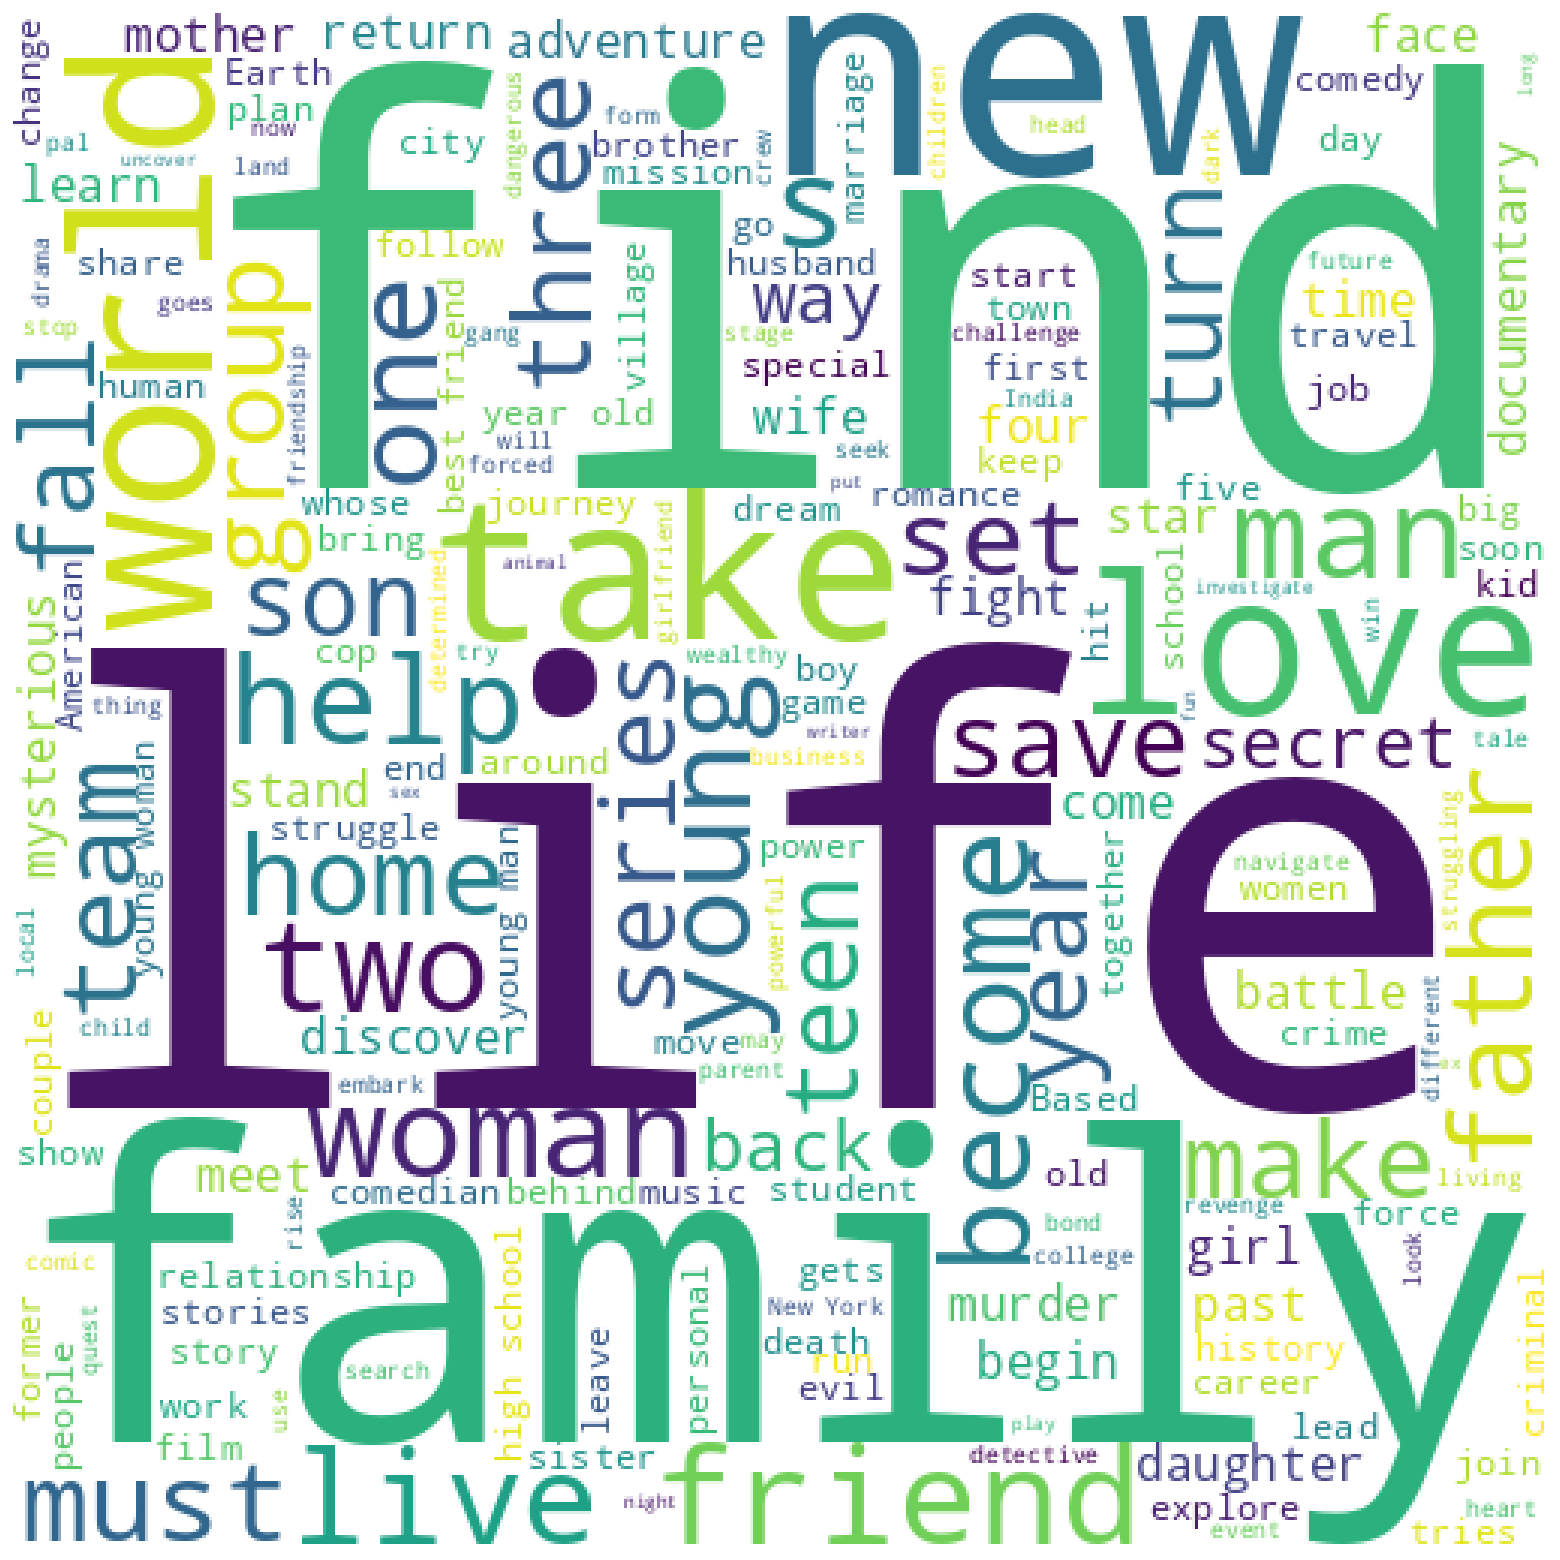

In [49]:
def wc(data, bgcolor):
    plt.figure(figsize=(20,20))
    mask = np.array(Image.open("/kaggle/input/netflix/netflix.png"))
    wc = WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask = mask)

    data_str = data.fillna('').astype(str)

    wc.generate("".join(data_str))
    plt.imshow(wc)
    plt.axis("off")

wc(dff["description"], "white")

## positive--- wordcloud

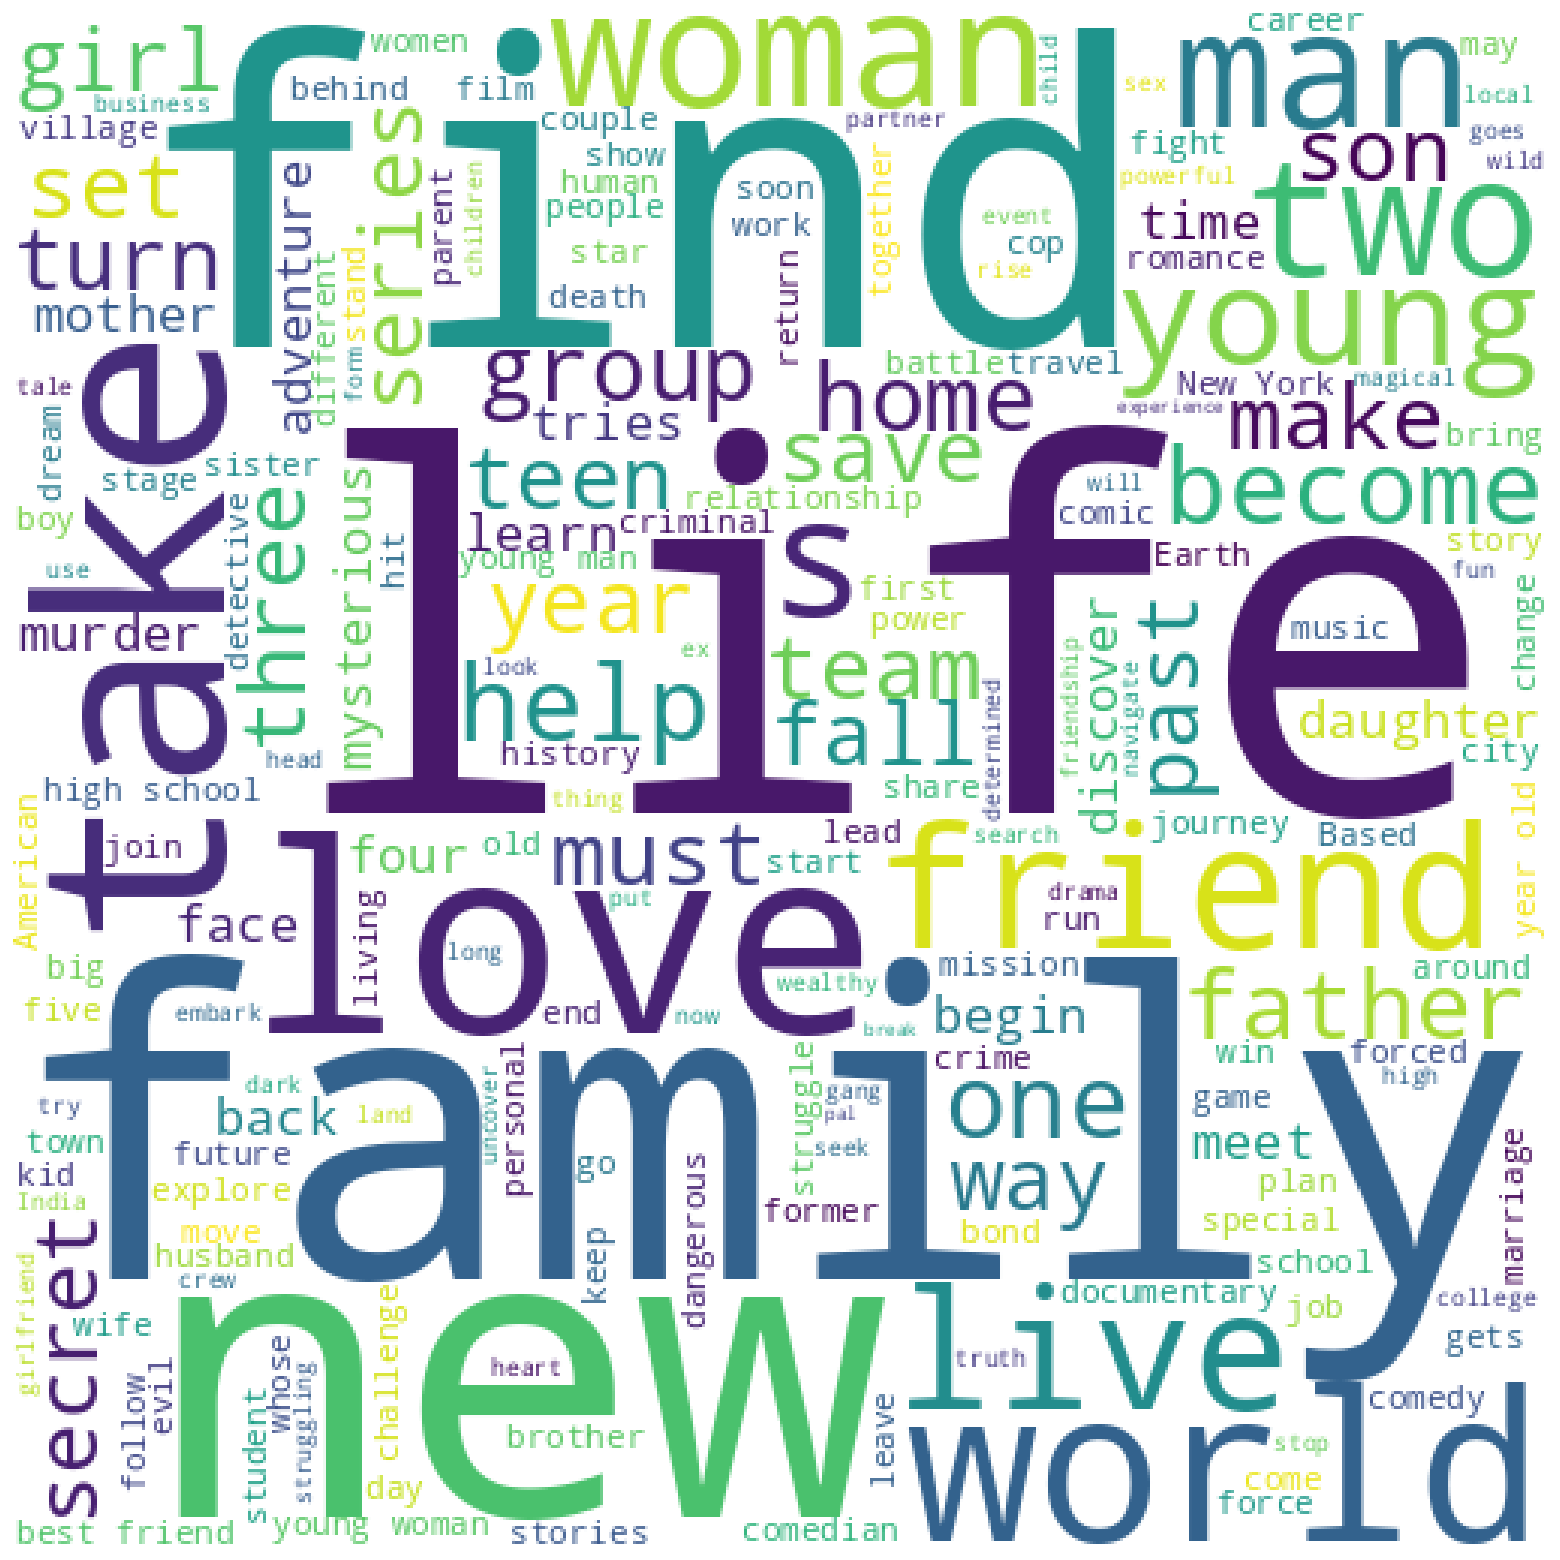

In [53]:
pos = dff[dff["sentiment"] == "positive"]["description"]

def wc(data, bgcolor):
    plt.figure(figsize=(20,20))
    mask = np.array(Image.open("/kaggle/input/netflix/netflix.png"))
    wc = WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask = mask)

    data_str = data.fillna('').astype(str)

    wc.generate("".join(data_str))
    plt.imshow(wc)
    plt.axis("off")

wc(pos, "white")

## neutral --- wordcloud

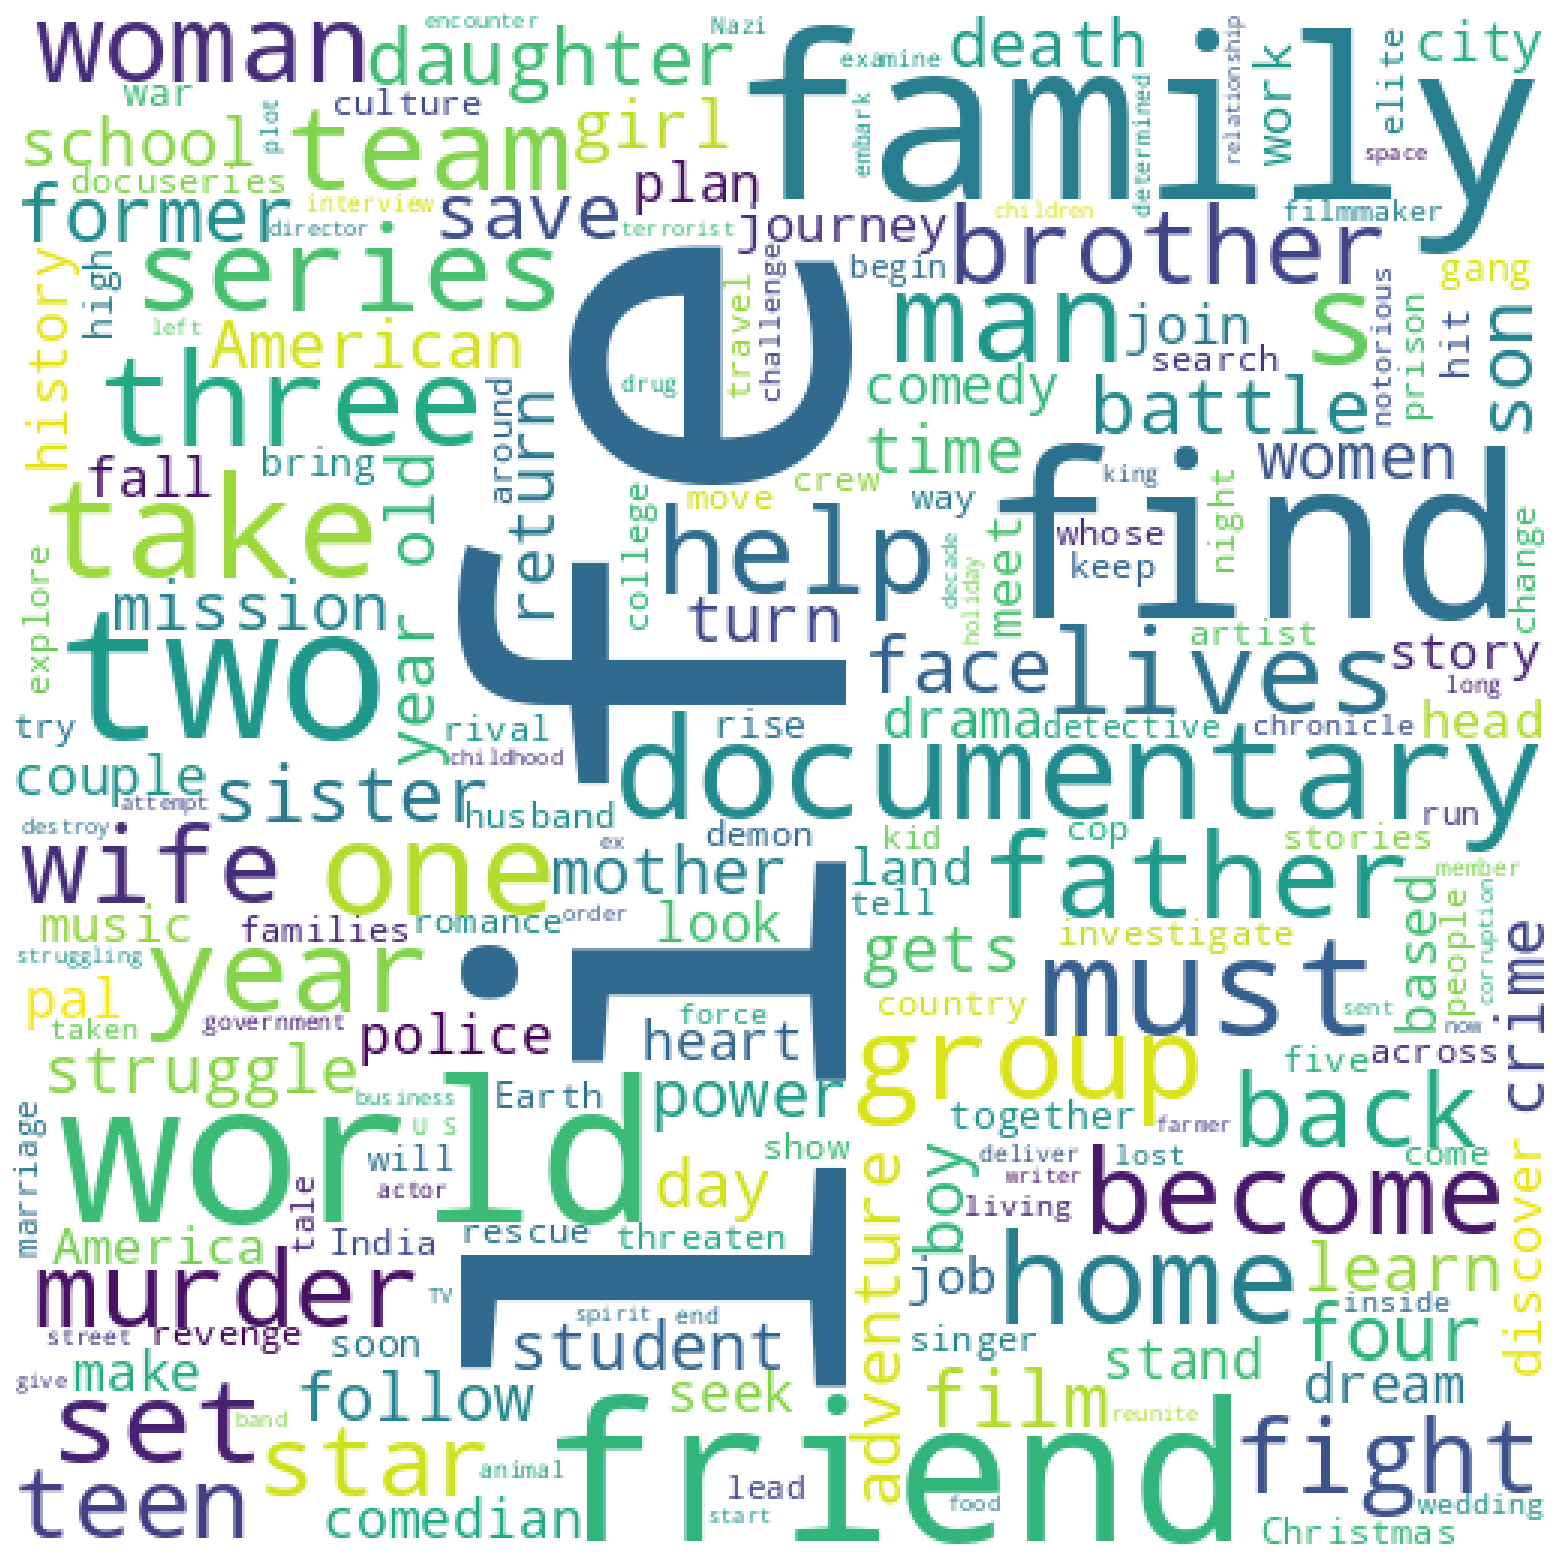

In [56]:
neu = dff[dff["sentiment"] == "neutral"]["description"]

def wc(data, bgcolor):
    plt.figure(figsize=(20,20))
    mask = np.array(Image.open("/kaggle/input/netflix/netflix.png"))
    wc = WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask = mask)

    data_str = data.fillna('').astype(str)

    wc.generate("".join(data_str))
    plt.imshow(wc)
    plt.axis("off")

wc(neu, "white")

## Sentiment of Content by Year

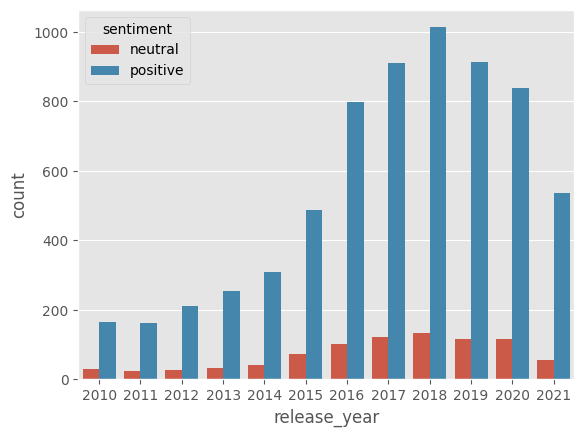

In [66]:
dff["release_year"] = df["release_year"]

dfx = dff.groupby(["release_year", "sentiment"]).size().reset_index(name="count")
dfx = dfx[dfx["release_year"] >= 2010]

sns.barplot(x="release_year", y="count", hue="sentiment", data=dfx);

The graph above shows that the most positive content was released in 2018 and positive contents always are more than neutral contents.

## Conclusion

I analyzed the netflix datas. I inferenced about directors, actors, countries, release year, sentiment analysis by using visualizations and some nlp techniques. 